In [74]:
import tensorflow as tf
import os

In [75]:
os.path.join('data', 'happy')
os.listdir('data')

['happy', 'sad']

In [76]:
# Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [77]:
data_dir = 'data'

In [78]:
image_exts = ['jpeg','jpg','bmp','png']

In [79]:
img = cv2.imread(os.path.join('data','happy','smile.woman_.jpg'))
img.shape

(3844, 5125, 3)

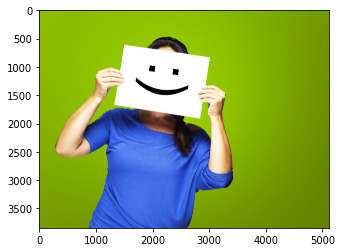

In [80]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [81]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
        

In [82]:
# Load data
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(), dtype=int32)

  To proces

In [83]:
import numpy as np

In [84]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 258 files belonging to 2 classes.


In [85]:
data_iterator = data.as_numpy_iterator()

In [86]:
data_iterator

In [87]:
# Get another batch from the iterator
batch = data_iterator.next()

In [88]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [89]:
# Class 1 = Sad People
# Class 0 = Happy People 
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

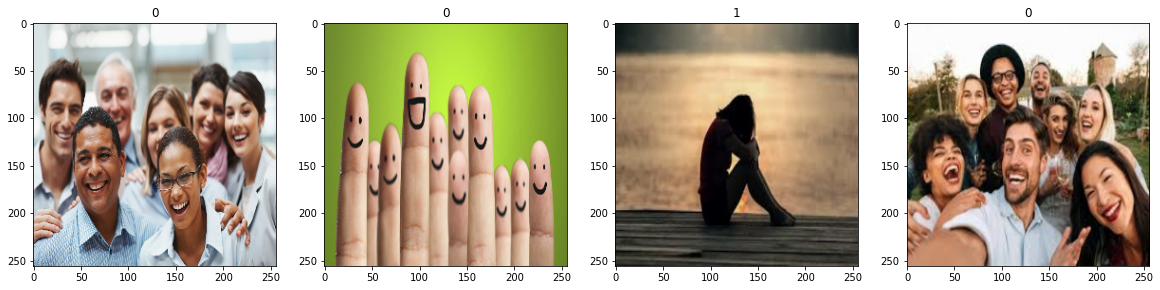

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [91]:
# Preprocess Data
# Scale data
data = data.map(lambda x, y: (x/225, y))

In [92]:
scaled_iterator = data.as_numpy_iterator()


In [93]:
scaled_iterator

In [94]:
batch = scaled_iterator.next()

In [95]:
batch[0].min()

0.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


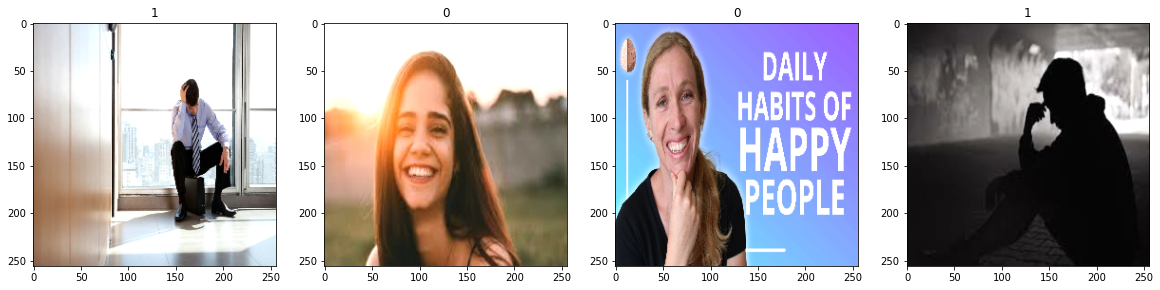

In [96]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [97]:
# Split data
len(data)

9

In [98]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [99]:
train_size + val_size + test_size

9

In [100]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [101]:
# Build Deep learning model
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [103]:

model = Sequential()

In [104]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [106]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [107]:
# Train

logdir='logs'

In [108]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [111]:

hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
6/6 [==============================] - 3s 483ms/step - loss: 0.7400 - accuracy: 0.5729 - val_loss: 0.6251 - val_accuracy: 0.6719
Epoch 2/20
6/6 [==============================] - 3s 459ms/step - loss: 0.6464 - accuracy: 0.5417 - val_loss: 0.5931 - val_accuracy: 0.6250
Epoch 3/20
6/6 [==============================] - 3s 462ms/step - loss: 0.5993 - accuracy: 0.6875 - val_loss: 0.4570 - val_accuracy: 0.8125
Epoch 4/20
6/6 [==============================] - 3s 460ms/step - loss: 0.5248 - accuracy: 0.7969 - val_loss: 0.5176 - val_accuracy: 0.8750
Epoch 5/20
6/6 [==============================] - 3s 469ms/step - loss: 0.4380 - accuracy: 0.8490 - val_loss: 0.3700 - val_accuracy: 0.8906
Epoch 6/20
6/6 [==============================] - 3s 467ms/step - loss: 0.4263 - accuracy: 0.8073 - val_loss: 0.3927 - val_accuracy: 0.7969
Epoch 7/20
6/6 [==============================] - 3s 457ms/step - loss: 0.3082 - accuracy: 0.9219 - val_loss: 0.2700 - val_accuracy: 0.8906
Epoch 8/20
6/6 [====

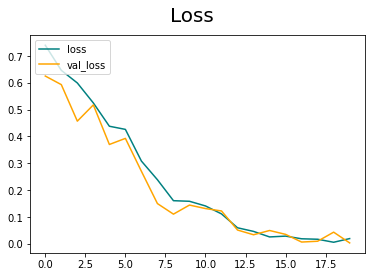

In [112]:
# Plot Performance

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

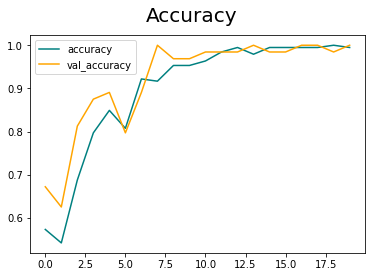

In [113]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [114]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [115]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [116]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 65ms/step


In [117]:

print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [118]:
#Test
import cv2

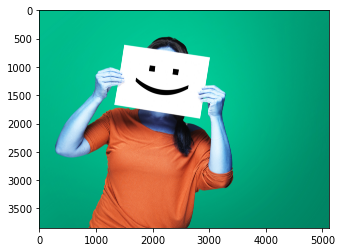

In [123]:

img = cv2.imread('sithudo.jpeg')
plt.imshow(img)
plt.show()

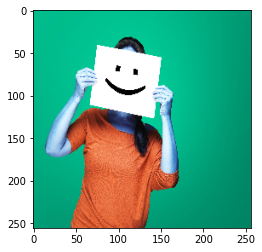

In [124]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [125]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 15ms/step


In [126]:
yhat

array([[0.14605783]], dtype=float32)

In [127]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [128]:
# Save the model

from tensorflow.keras.models import load_model


In [129]:
model.save(os.path.join('models','imageclassifier.h5'))

In [131]:
new_model = load_model('models/imageclassifier.h5')

In [132]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 63ms/step


array([[0.14605783]], dtype=float32)